<a href="https://colab.research.google.com/github/patjun740-1/personal-projects/blob/main/NLPSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 448 kB 61.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/l

In [2]:
import re 
import urllib.request 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white') 

from konlpy.tag import Mecab   
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences




### **LOADING DATA**

In [3]:
from google.colab import files
uploaded = files.upload() 

Saving train.csv to train.csv


In [4]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe  
# train_data.SentimentText=train_data.SentimentText.astype(str)
print(len(train_data)) 

7581


In [5]:
from google.colab import files
uploaded = files.upload() 

Saving test.csv to test.csv


In [6]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# Dataset is now stored in a Pandas Dataframe
print(len(test_data)) 

2528


In [8]:

train_data['rating'] = train_data['rating'].fillna(0.0).astype(int)
test_data['rating'] = test_data['rating'].fillna(0.0).astype(int) 
train_data['review'] = train_data['review'].fillna(0.0).astype(str)
test_data['review'] = test_data['review'].fillna(0.0).astype(str)
print(train_data)

      Unnamed: 0      name  ... rating  label
0           4089      정육면체  ...      4      1
1           9953  이석덕생면파스타  ...      5      1
2           7658        난향  ...      5      1
3          11327   버거리 신촌점  ...      2      0
4           1933     가문의우동  ...      5      1
...          ...       ...  ...    ...    ...
7576         703       고르드  ...      3      0
7577          11   부탄츄 신촌점  ...      5      1
7578         911     셀리스도넛  ...      5      1
7579        1402  마녀주방 신촌점  ...      5      1
7580       11698      형제갈비  ...      3      0

[7581 rows x 5 columns]


In [9]:
train_data['label'] = np.select([train_data.rating > 3], [1], default = 0)
print(len(train_data))

7581


In [10]:
train_data['rating'].nunique(), train_data['review'].nunique(), train_data['label'].nunique() 

(6, 7581, 2)

In [11]:
train_data.drop_duplicates(subset=['review'], inplace = True) 
print(train_data[:10])



   Unnamed: 0       name  ... rating  label
0        4089       정육면체  ...      4      1
1        9953   이석덕생면파스타  ...      5      1
2        7658         난향  ...      5      1
3       11327    버거리 신촌점  ...      2      0
4        1933      가문의우동  ...      5      1
5        1500   마녀주방 신촌점  ...      5      1
6        2167        청화원  ...      5      1
7        2289        청화원  ...      5      1
8        5497  머노까머나 신촌점  ...      3      0
9        9350         아마  ...      4      1

[10 rows x 5 columns]


,label,count
0,0,798
1,1,6783


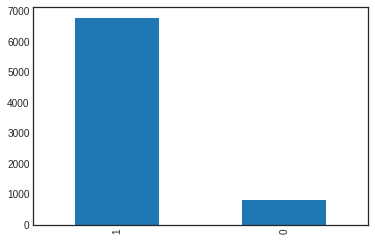

In [12]:
train_data['label'].value_counts().plot(kind = 'bar')
train_data.groupby('label').size().reset_index(name='count')

In [13]:
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","") 
train_data['review'].replace('',np.nan, inplace = True) 
print(len(train_data))

7581


In [14]:
test_data.drop_duplicates(subset=['review'], inplace = True) 
test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","") 
test_data['review'].replace('',np.nan, inplace = True) 
print(len(test_data))

2528


### **토큰화 및 불용어 제거 **

In [15]:
stopWords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


In [16]:

train_data['review'] = train_data['review'].fillna(0.0).astype(str)
test_data['review'] = test_data['review'].fillna(0.0).astype(str)
mecab = Mecab() 
train_data['review'] = train_data['review'].apply(mecab.morphs) 

train_data['review'] = train_data['review'].apply(lambda x : [item for item in x if item not in stopWords])


In [17]:


x_train = train_data['review'].values 
y_train = train_data['label'].values 
x_test = test_data['review'].values 
y_test = test_data['label'].values  

print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

(7581,)
(7581,)
(2528,)
(2528,)


### **빈도 수가 낮은 단어 제거  **


*   빈도수가 낮으면 학습을 방해함 




In [18]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(x_train)
print(x_train)

[list(['ㅡ'])
 list(['탈리아텔레', '진짜', '맛', '잇', '었', '파스타', '면발', '독특', '면서', '식감', '너무', '좋', '네요'])
 list(['난향', '늘', '실망', '시키', '않', '습니다', '또', '갈께요']) ...
 list(['도넛', '너무', '맛있', '습니다'])
 list(['파스타', '인데', '메뉴', '생각', '보다', '빨리', '나와서', '너무', '좋', '았', '습니다', '인테리어', '컨셉', '좋', '아서', '재밌', '끼', '했', '네요'])
 list(['갈비탕', '맛나', '요'])]


In [19]:


threshold = 2
words_cnt = len(tokenizer.word_index)
rare_cnt = 0 
words_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items(): 
  words_freq = words_freq + value 
  if value < threshold: 
    rare_cnt +=1 
    rare_freq = rare_freq + value  

print("전체 단어 수:", words_cnt) 
print("빈도가 {} 이하인 희귀 단어 수: {}".format(threshold-1, rare_cnt))  
print("희귀 단어 비율: {}".format((rare_cnt / words_cnt)*100)) 
print("희귀 단어 등장 빈도 비율: {}".format((rare_freq / words_freq)*100))


전체 단어 수: 8012
빈도가 1 이하인 희귀 단어 수: 4056
희귀 단어 비율: 50.62406390414378
희귀 단어 등장 빈도 비율: 3.3573657591735717


In [20]:
vocab_size = words_cnt - rare_cnt +2 
print(vocab_size)

3958


In [21]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [22]:
print(x_train[:2]) 
print(x_test[:2])

[[1], [2061, 23, 7, 173, 6, 124, 825, 563, 238, 419, 9, 5, 13]]
[[1], [1]]


### **패딩 (길이 맞추기)**

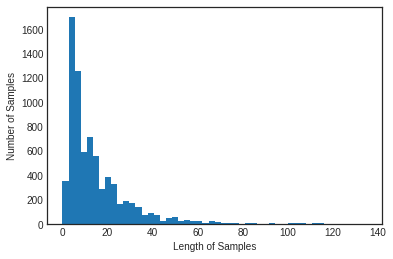

In [23]:
plt.hist([len(s) for s in x_train], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [24]:
max_len = 60
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)


## **모델 구축 및 학습 **

In [25]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model 
from tensorflow.python.keras.layers import Embedding, Dense, GRU  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint 



In [26]:
model = Sequential() 
model.add(Embedding(vocab_size, 100)) 
model.add(GRU(128))  
model.add(Dense(1, activation = 'sigmoid'))


In [27]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', verbose =1, save_best_only= True)

In [28]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 15, callbacks=[es, mc], batch_size = 60, validation_split=0.2)

Epoch 1/15
102/102 [==============================] - 19s 158ms/step - loss: 0.2982 - acc: 0.8917 - val_loss: 0.2699 - val_acc: 0.8879

Epoch 00001: val_acc improved from -inf to 0.88794, saving model to best_model.h5
Epoch 2/15
102/102 [==============================] - 16s 155ms/step - loss: 0.2015 - acc: 0.9218 - val_loss: 0.2549 - val_acc: 0.9005

Epoch 00002: val_acc improved from 0.88794 to 0.90046, saving model to best_model.h5
Epoch 3/15
102/102 [==============================] - 16s 161ms/step - loss: 0.1671 - acc: 0.9388 - val_loss: 0.2281 - val_acc: 0.9163

Epoch 00003: val_acc improved from 0.90046 to 0.91628, saving model to best_model.h5
Epoch 4/15
102/102 [==============================] - 16s 155ms/step - loss: 0.1448 - acc: 0.9497 - val_loss: 0.2406 - val_acc: 0.9143

Epoch 00004: val_acc did not improve from 0.91628
Epoch 5/15
102/102 [==============================] - 16s 155ms/step - loss: 0.1289 - acc: 0.9537 - val_loss: 0.2294 - val_acc: 0.9216

Epoch 00005: val_a

In [29]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(x_test,y_test)

79/79 [==============================] - 2s 17ms/step - loss: 0.5390 - acc: 0.8896


[0.5390097498893738, 0.8896360993385315]

### **시각화**

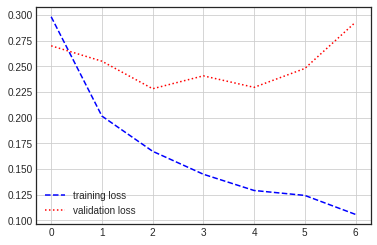

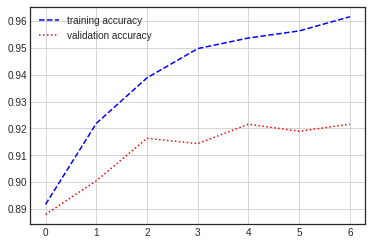

In [30]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'training loss')
plt.plot(val_loss, 'r:', label = 'validation loss')
plt.legend()
plt.grid() 

plt.figure()
plt.plot(acc, 'b--', label = 'training accuracy')
plt.plot(val_acc, 'r:', label = 'validation accuracy')
plt.legend()
plt.grid()

plt.show()




### **감정 예측**

In [33]:
def sentiment_predict(new_sentence): 
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopWords] 
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen = max_len)
  score = float(loaded_model.predict(new_pad)) 
  print("score :{}".format(score)) 

  if score > 0.5: 
    print("{} -> 긍정({:.2f}%".format(new_sentence, score * 100)) 
  else:  
    print("{} -> 부정({:.2f}%".format(new_sentence, (1-score) * 100))  
  print('')



In [37]:
sentiment_predict('정말 맛있네요') 
sentiment_predict('미친듯이 맛있네요') 
sentiment_predict('맛없네요') 
sentiment_predict('너무 맛없어요') 
sentiment_predict('한번 먹을만 해')  
sentiment_predict('나쁘지 않아') 
sentiment_predict('다음에도 또 올듯!')


score :0.9726362228393555
정말 맛있네요 -> 긍정(97.26%

score :0.9768764972686768
미친듯이 맛있네요 -> 긍정(97.69%

score :0.3372054100036621
맛없네요 -> 부정(66.28%

score :0.36982491612434387
너무 맛없어요 -> 부정(63.02%

score :0.7797280550003052
한번 먹을만 해 -> 긍정(77.97%

score :0.4905396103858948
나쁘지 않아 -> 부정(50.95%

score :0.9989722967147827
다음에도 또 올듯! -> 긍정(99.90%

